# 决策树（Decision Tree）相关算法

### 1 概念

决策树是一种树形结构，每个内部节点表示一个属性判断，每条分支代表一个判断结果的输出，每个叶子节点代表一种分类结果。决策树的生成属于监督学习。

* 优点：计算复杂度不高，输出结果易于理解，对中间值缺失不敏感，可以处理不相关特征数据
* 缺点：可能会产生过度匹配问题
* 适用数据类型：数值型和标称型

### 2 决策树的构造

#### 2.1 使用信息论划分数据集

划分数据集的大原则是：将无序的数据变得更加有序。在构造决策树时，我们需要解决的第一个问题就是，当前数据集上哪个特征在划分数据分类时起决定性作用。因此必须评估每个特征。

测试完成后，原始数据集被划分为几个数据子集，它们分布在第一个决策点所有分支上，接着递归划分，直到数据子集内的数据均属于同一类型为止。

```
# 检测数据集中的每个子项是否属于同一分类：
If so return 类标签；
Else
    寻找划分数据集的最好特征
    划分数据集
    创建分支节点
        for 每个划分的子集
            调用函数createBranch并增加返回结果到分支节点中
    return 分支节点
```

#### 2.2 决策树的一般流程

1. 收集数据：可以使用任何方法
2. 准备数据：决策树构造算法只适用于标称型数据，因此数值型数据必须离散化
3. 分析数据：可以使用任何方法，构造树完成之后，我们应该检查图形是否符合预期
4. 训练算法：构造树的数据结构
5. 测试算法：使用经验树计算错误率
6. 使用算法：此步骤可以适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义

#### 2.3 信息增益与熵

在划分数据集之前之后信息发生的变化称为信息增益，知道如何计算信息增益，我们就可以
计算每个特征值划分数据集获得的信息增益，获得信息增益最高的特征就是最好的选择。

熵定义为信息的期望值，在明晰这个概念之前，我们必须知道信息的定义。如果待分类的事
务可能划分在多个分类之中，则符号$x_i$的信息定义为

<center>$l(x_i) = -log_2p(x_i)$</center>
  
其中$p(x_i)$是选择该分类的概率。

为了计算熵，我们需要计算所有类别所有可能值包含的信息期望值，通过下面的公式得到：
  
<center>$H = -\sum_{i=1}^{n}p(x_i)log_2p(x_i)$</center>

其中$n$是分类的数目。

### 3 实现决策树：ID3算法

#### 3.1 构造决策树

下面编程实现构造决策树（ID3算法）。

In [1]:
from math import log

'''

计算给定数据集的香农熵

@param data 待计算数据集

'''
def calc_shannon_ent(data):
    num_entries = len(data)
    label_counts = {}
    
    # 为所有可能分类创建字典
    for feat_vec in data:
        cur_label = feat_vec[-1]   
        if cur_label not in label_counts.keys():
            label_counts[cur_label] = 0
        label_counts[cur_label] += 1
        
    # 计算香农熵
    shannon_ent = 0.0
    for key in label_counts:
        prob = float(label_counts[key]) / num_entries
        shannon_ent -= prob * log(prob, 2)
    print(shannon_ent)
    return shannon_ent

In [2]:
'''

按照给定特征划分数据集

@param data 待划分的数据集
@param axis 划分数据集的特征
@param value 需要返回的特征的值

'''

def split_data_set(data, axis, value):
    ret_data_set = []
    for feat_vec in data:
        if feat_vec in data:
            reduced_feat_vec = feat_vec[:axis]
            reduced_feat_vec.extend(feat_vec[axis + 1:])
            ret_data_set.append(reduced_feat_vec)
    return ret_data_set

In [3]:
'''

创建数据集

'''

def create_data_set():
    data = [[1, 1, 'yes'],
            [1, 1, 'yes'],
            [0, 0, 'no'],
            [0, 1, 'no'],
            [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return data, labels

In [4]:
'''

选择最好的数据集划分方式

@param data 数据集

'''

def choose_best_split_feature(data):
    num_features = len(data[0]) - 1
    base_entropy = calc_shannon_ent(data)
    print(base_entropy)
    best_info_gain = 0.0
    best_feature = -1
    for i in range(num_features):
        feat_list = [example[i] for example in data]
        unique_vals = set(feat_list)
        new_entropy = 0.0
        for value in unique_vals:
            sub_data_set = split_data_set(data, i, value)
            prob = len(sub_data_set) / float(len(data))
            new_entropy += prob * calc_shannon_ent(sub_data_set)
        info_gain = base_entropy + new_entropy
        print(new_entropy)
        if info_gain > best_info_gain:            
            best_info_gain = info_gain
            best_feature = i
    print(best_info_gain)
    return best_feature

> 函数choose_best_split_feature中调用的数据需要满足一定的要求：第一个要求是，数据必须是一种由列表元素组成的列表，而且所有的列表元素都要具有相同的数据长度；第二个要求是，数据的最后一列或者每个实例的最后一个元素是当前实例的类别标签

In [5]:
'''

计算出现次数最多的分类名称

@param class_list 类别列表

'''

import operator

def majority_cnt(class_list):
    class_count={}
    for vote in class_list:
        if vote not in class_count.keys():
            class_count[vote] = 0
        class_count[vote] += 1
    sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_class_count[0][0]

In [6]:
'''

创建决策树

@param data 数据集
@param labels 标签集

'''

def create_tree(data, labels):
    class_list = [example[-1] for example in data]
    
    # 类别相同则停止继续划分
    if class_list.count(class_list[0]) == len(class_list):
        return class_list[0]
    
    # 遍历完所有特征时返回出现次数最多的特征
    if len(data[0]) == 1:
        return majority_cnt(class_list)
    
    best_feat = choose_best_split_feature(data)
    best_feat_label = labels[best_feat]
    my_tree = {best_feat_label:{}}    
    del(labels[best_feat])
    
    # 得到包含所有属性值的列表
    feat_values = [example[best_feat] for example in data]
    unique_vals = set(feat_values)
    for value in unique_vals:
        sub_labels = labels[:] # 复制标签列表以防混乱
        my_tree[best_feat_label][value] = create_tree(split_data_set(data, best_feat, value), sub_labels) 
    return my_tree

In [7]:
data, labels = create_data_set()
data2 = split_data_set(data, 0, 1)
print(data)
print(data2)

[[1, 1, 'yes'], [1, 1, 'yes'], [0, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
[[1, 'yes'], [1, 'yes'], [0, 'no'], [1, 'no'], [1, 'no']]


In [8]:
calc_shannon_ent(data)

0.9709505944546686


0.9709505944546686

In [9]:
choose_best_split_feature(data)

0.9709505944546686
0.9709505944546686
0.9709505944546686
0.9709505944546686
1.9419011889093372
0.9709505944546686
0.9709505944546686
1.9419011889093372
2.9128517833640055


0

In [10]:
my_tree = create_tree(data, labels)

0.9709505944546686
0.9709505944546686
0.9709505944546686
0.9709505944546686
1.9419011889093372
0.9709505944546686
0.9709505944546686
1.9419011889093372
2.9128517833640055
0.9709505944546686
0.9709505944546686
0.9709505944546686
0.9709505944546686
1.9419011889093372
2.9128517833640055
0.9709505944546686
0.9709505944546686
0.9709505944546686
0.9709505944546686
1.9419011889093372
2.9128517833640055


In [11]:
my_tree

{'no surfacing': {0: {'flippers': {0: 'no', 1: 'no'}},
  1: {'flippers': {0: 'no', 1: 'no'}}}}

#### 3.2 将决策树可视化

为了可视化生成的决策树，需要对数据进行文本注解。

In [12]:
'''

使用文本注解绘制树节点（示例）

'''

import matplotlib.pyplot as plt

decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(node_txt, center_pt, parent_pt, node_type):
    createPlot.ax1.annotate(node_txt, 
                            xy=parent_pt, 
                            xycoords="axes fraction", 
                            xytext=center_pt, 
                            textcoords="axes fraction", 
                            va="center", 
                            ha="center", 
                            bbox=node_type, 
                            arrowprops=arrow_args)

In [13]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )
    
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

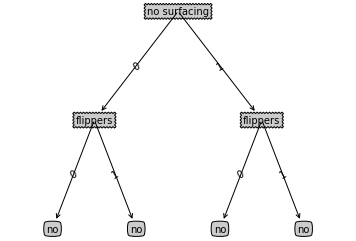

In [14]:
def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

createPlot(my_tree)